In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LinearRegression

In [2]:
class Data:
    def __init__(self, filename=None):
        self.df = None
        self.angle = None
        self.power_units = None
        self.comments = None
        self.duration = None
        if filename:
            self.parse_data(filename)
    
    def parse_data(self, filename):
        with open(filename) as f:
            lines = f.readlines()
            # the first 8 lines are metadata
            metadata, data = lines[:8], lines[8:]
            duration = float(metadata[1].split(" ")[-1])
            angle = metadata[3].split(" ")[-1].strip()
            try:
                angle = float(angle)
            except:
                angle = "N/A"
            power_units = metadata[6].split(" ")[-1]
            comments = metadata[7].split(":")[-1].strip()
            json = {
                "time" : [],
                "power" : [],
                "temperature" : []
            }
            for line in data:
                time, power, temp = line.split(" ")
                json["time"].append(float(time))
                json["power"].append(float(power))
                json["temperature"].append(float(temp))
        for datatype in json.keys():
            json[datatype] = np.array(json[datatype])
        self.df = pd.DataFrame.from_dict(json)
        self.angle = angle
        self.power_units = power_units
        self.comments = comments
        self.duration = duration
    
    def split_data(self, data, n=2):
        timesteps = data.count().time
        split = timesteps//n
        datasets = []
        for i in range(n):
            data = Data()
            data.df = data[i*split : (i+1)*split]
            data.angle = self.angle
            data.power_units = self.power_units
            data.comments = self.comments
            data.duration = self.duration
            datasets.append(data)
        return datasets


In [3]:
def compute_regression_params(X, Y):
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    return model.intercept_, model.coef_, r_sq

In [4]:
def plot_calibration(paired_datasets):
    temperatures = []
    powers = []
    colors = {
        0 : 'r', 
        1 : 'g', 
        2 : 'b'
    }
    for pair in paired_datasets:
        ambient_Data, cold_Data = pair
        df_ambient, df_cold = ambient_Data.df, cold_Data.df
        avg_ambient_tmp, avg_ambient_power = df_ambient.temperature.mean(), df_ambient.power.mean()
        avg_cold_tmp, avg_cold_power = df_cold.temperature.mean(), df_cold.power.mean()
        temperatures.append([avg_ambient_tmp, avg_cold_tmp])        
        powers.append([avg_ambient_power, avg_cold_power])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(len(temperatures)):
        ax.plot(temperatures[i], powers[i], c=colors[i], label=str(i))
    plt.legend(loc='upper left');
    plt.show()

In [40]:
def plot_angle(datasets, transform=False):
    angles = []
    powers = []
    for data in datasets:
        angle, df = data.angle, data.df
        if type(angle) is not float: continue
        avg_power = df.power.mean()
        angles.append(angle if not transform else 1.0/np.sin(angle*np.pi/180))
        powers.append(avg_power)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(angles, powers, c='b')
    plt.legend(loc='upper left');
    plt.show()

In [41]:
data1 = Data(os.getcwd()+"/datasets/spring2020_1/2020-02-14_14:15:03_Readout.txt") # no liquid nitrogen
data2 = Data(os.getcwd()+"/datasets/spring2020_1/2020-02-14_14:20:30_Readout.txt") # liquid nitrogen
data3 = Data(os.getcwd()+"/datasets/spring2020_2/2020-02-14_15:26:34_Readout.txt")  # no liquid nitrogen
data4 = Data(os.getcwd()+"/datasets/spring2020_2/2020-02-14_15:11:08_Readout.txt")  # liquid nitrogen

In [42]:
data1.df.describe()

,time,power,temperature
count,9.900000e+01,99.000000,99.000000
mean,1.581708e+09,-0.171677,272.996162
std,2.905573e+00,0.000119,0.007654
min,1.581708e+09,-0.171900,272.980000
25%,1.581708e+09,-0.171800,272.990000
50%,1.581708e+09,-0.171700,272.990000
75%,1.581708e+09,-0.171600,273.000000
max,1.581708e+09,-0.171500,273.010000


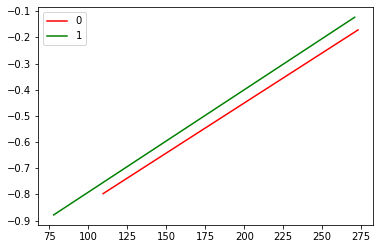

In [43]:
plot_calibration([(data1, data2), (data3, data4)])

In [61]:
files = [os.getcwd()+'/datasets/data/sky_dip/1/'+file for file in os.listdir(os.getcwd()+"/datasets/data/sky_dip/1")]
datasets = []
for file in files[:]:
    datasets.append(Data(file))

No handles with labels found to put in legend.


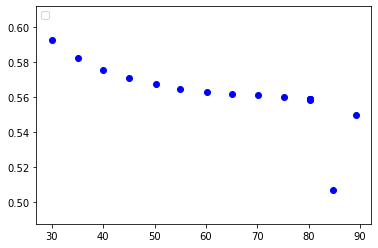

In [62]:
plot_angle(datasets, transform=False)

No handles with labels found to put in legend.


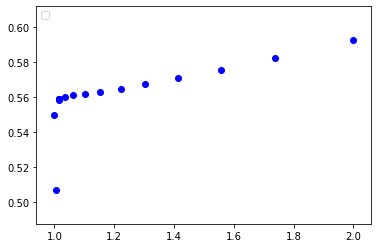

In [63]:
plot_angle(datasets, transform=True)

In [77]:
files = [os.getcwd()+'/datasets/data/sky_dip_pizza/1/'+file for file in os.listdir(os.getcwd()+"/datasets/data/sky_dip_pizza/1")]
datasets = []
for file in files[:]:
    datasets.append(Data(file))

No handles with labels found to put in legend.


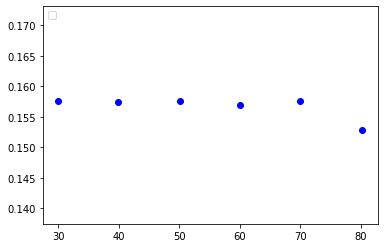

In [78]:
plot_angle(datasets, transform=False)

No handles with labels found to put in legend.


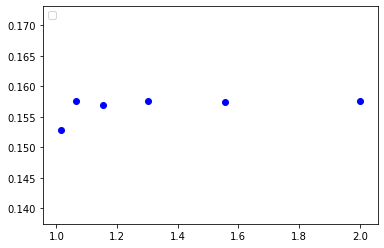

In [79]:
plot_angle(datasets, transform=True)

In [67]:
files = [os.getcwd()+'/datasets/data/sky_dip/2/'+file for file in os.listdir(os.getcwd()+"/datasets/data/sky_dip/2")]
datasets = []
for file in files[:]:
    datasets.append(Data(file))

No handles with labels found to put in legend.


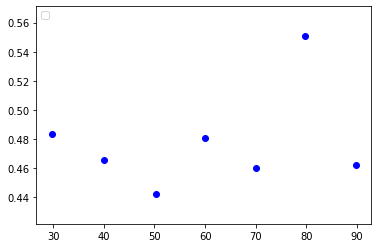

In [68]:
plot_angle(datasets, transform=False)

No handles with labels found to put in legend.


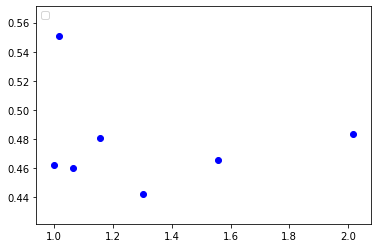

In [69]:
plot_angle(datasets, transform=True)

In [71]:
[dataset.angle for dataset in datasets]

[50.2, 89.8, 60.05, 79.75, 29.7, 70.1, 40.0]

In [72]:
[dataset.df.power.mean() for dataset in datasets]

[0.4423410774410772,
 0.4621079258010121,
 0.48071720067453755,
 0.550541483979764,
 0.4831561551433405,
 0.4602562289562285,
 0.46572996632996766]

In [75]:
[(dataset.df.power.mean(), dataset.df.power.std()) for dataset in datasets]

[(0.4423410774410772, 0.006112329301897596),
 (0.4621079258010121, 0.00032728600584251276),
 (0.48071720067453755, 0.00011743711025228864),
 (0.550541483979764, 0.00017173348153090006),
 (0.4831561551433405, 0.0005597719638974109),
 (0.4602562289562285, 0.004311160846722178),
 (0.46572996632996766, 0.00046558925533381104)]

In [76]:
datasets[-2].df.describe()

,time,power,temperature
count,5.940000e+02,594.000000,594.0
mean,1.582320e+09,0.460256,0.0
std,1.735945e+01,0.004311,0.0
min,1.582320e+09,0.451400,0.0
25%,1.582320e+09,0.456100,0.0
50%,1.582320e+09,0.463900,0.0
75%,1.582320e+09,0.464100,0.0
max,1.582320e+09,0.464400,0.0
